# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset.

Add any relevant insight for future modelling.

# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Data

In [2]:
df = pd.read_csv("data/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Signs

- Sex - M(male), F(female) and I (baby)
- Length - length in mm (largest linear size of abalone)
- Diameter - diameter in mm, perpendicular to the length
- Height - height in mm from pulp
- Whole weight - total weight of the eyelet in grams
- Shucked weight - pulp weight in grams
- Viscera weight - viscera weight in grams
- Shell weight - shell weight in grams

### Target feature

- Age - age is calculated as rings(number of rings) + 1.5

In [4]:
df.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [5]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.duplicated().sum()

0

The dataset has no missing values or duplicates

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

### Let's look at the correlation matrices.

- Pearson correlation

<AxesSubplot: >

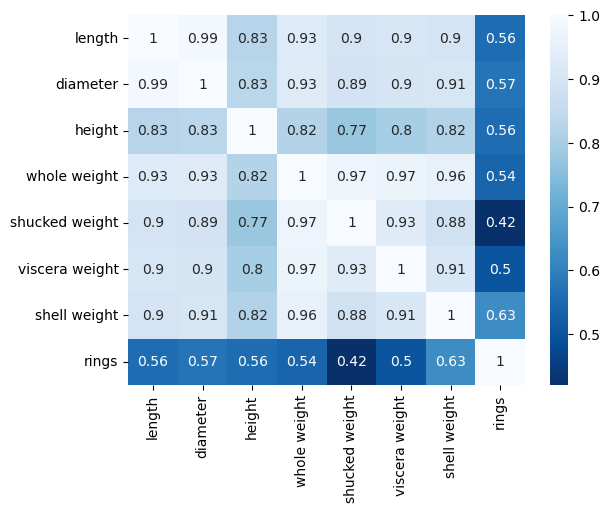

In [8]:
df_num = df.drop("sex", axis=1)
corr = df_num.corr()

sns.heatmap(corr, cmap="Blues_r", annot=True)

- Spearman correlation

<AxesSubplot: >

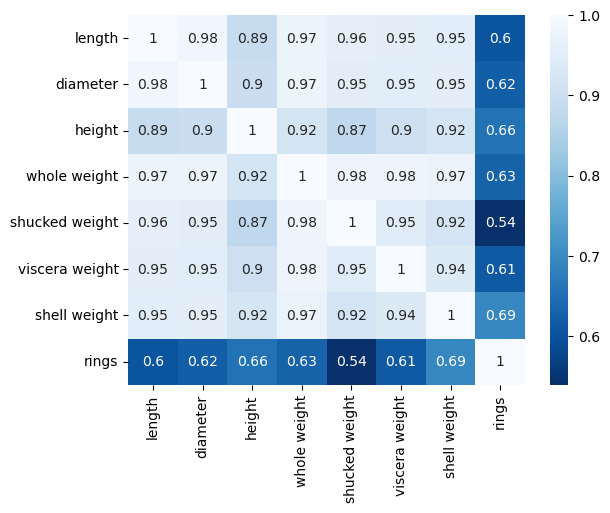

In [9]:
corr = df_num.corr(method="spearman")

sns.heatmap(corr, cmap="Blues_r", annot=True)

- Kendala correlation

<AxesSubplot: >

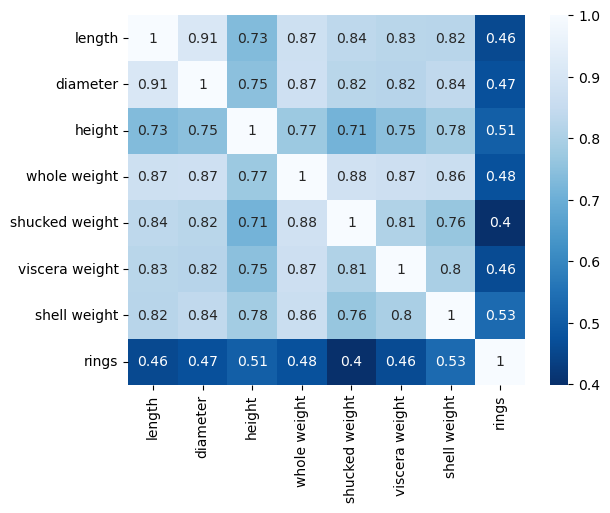

In [10]:
corr = df_num.corr(method="kendall")

sns.heatmap(corr, cmap="Blues_r", annot=True)

There is no significant difference in the obtained correlation coefficients. The highest correlation coefficient of the target with the shell weight. And the minimum with the shucked weight. Other coefficients are close.


### Let's look at the correlation between numerical and categorical trait (gender) using ANOVA.

In [11]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == "object" and df[c2].dtype != "object":
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({"Category": c1, "Numerical": c2, "Is correlated": "No"})
            else:
                Data.append({"Category": c1, "Numerical": c2, "Is correlated": "Yes"})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,sex,length,Yes
1,sex,diameter,Yes
2,sex,height,Yes
3,sex,whole weight,Yes
4,sex,shucked weight,Yes
5,sex,viscera weight,Yes
6,sex,shell weight,Yes
7,sex,rings,Yes


Apparently, the gender is correlated with all of the columns

### Let's look at our target variable

<AxesSubplot: xlabel='rings', ylabel='Count'>

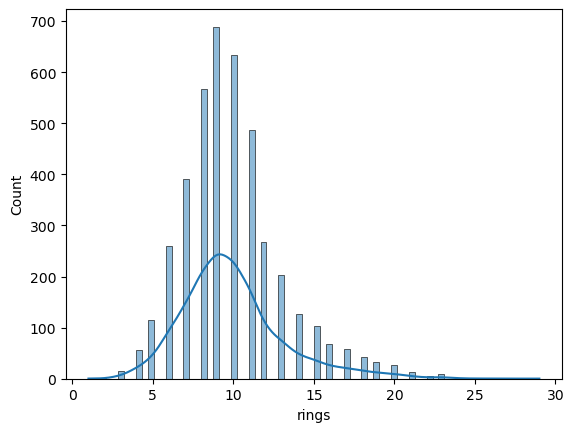

In [12]:
sns.histplot(data=df["rings"], kde=True)

Calculate the target according to the dataset description (age is the number of rings + 1.5): age = 1.5 + rings

In [13]:
df["age"] = df["rings"] + 1.5

### Let's look at the distribution of other numerical variables

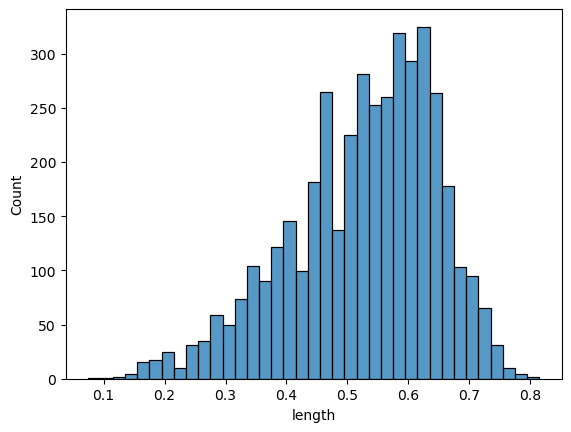

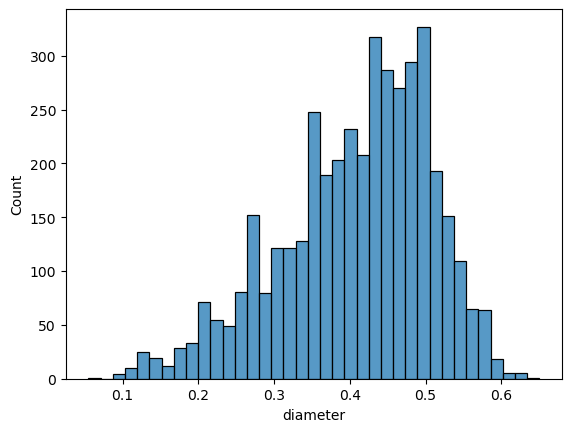

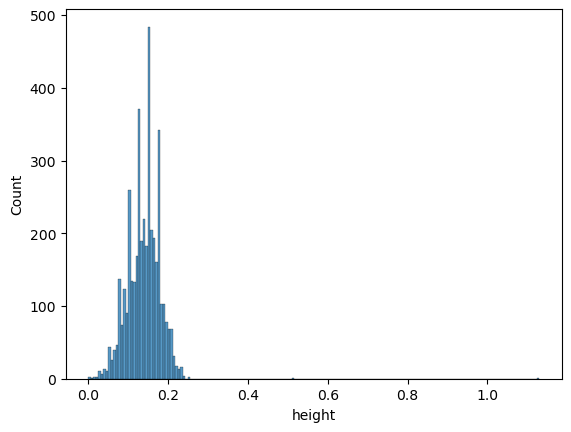

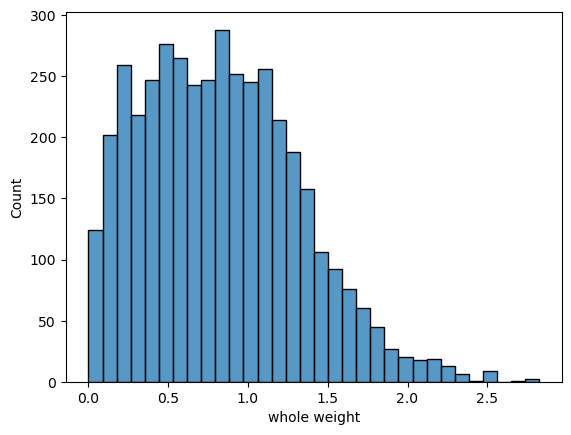

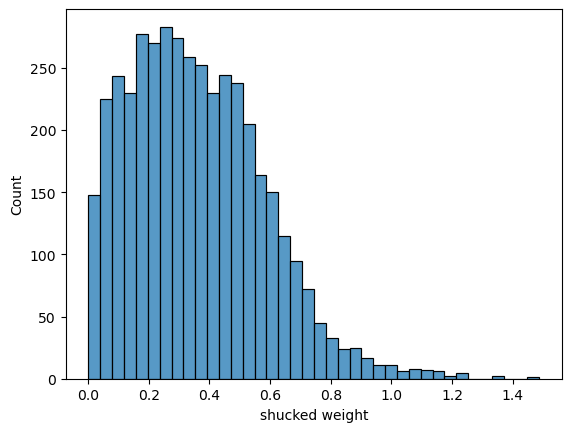

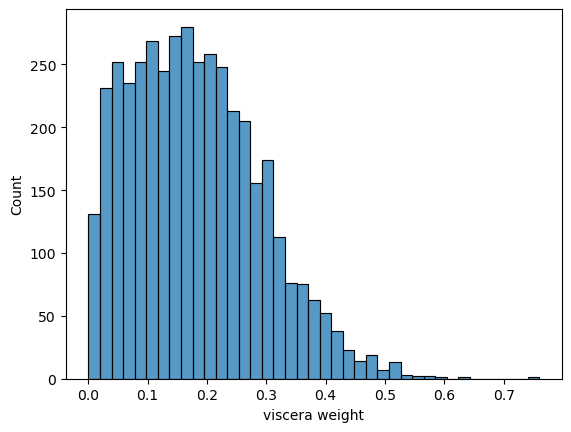

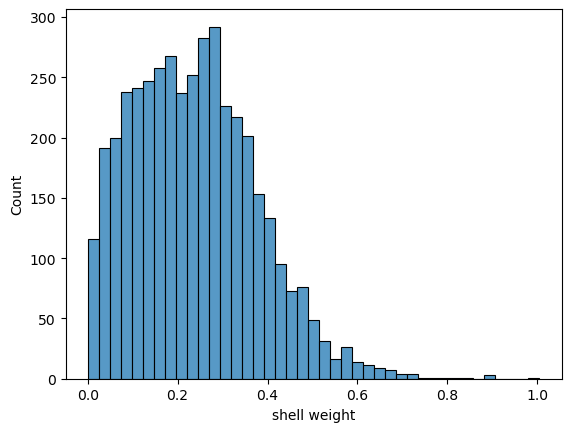

In [14]:
num_cols = [
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
]
for c in num_cols:
    sns.histplot(df[c])
    plt.show()

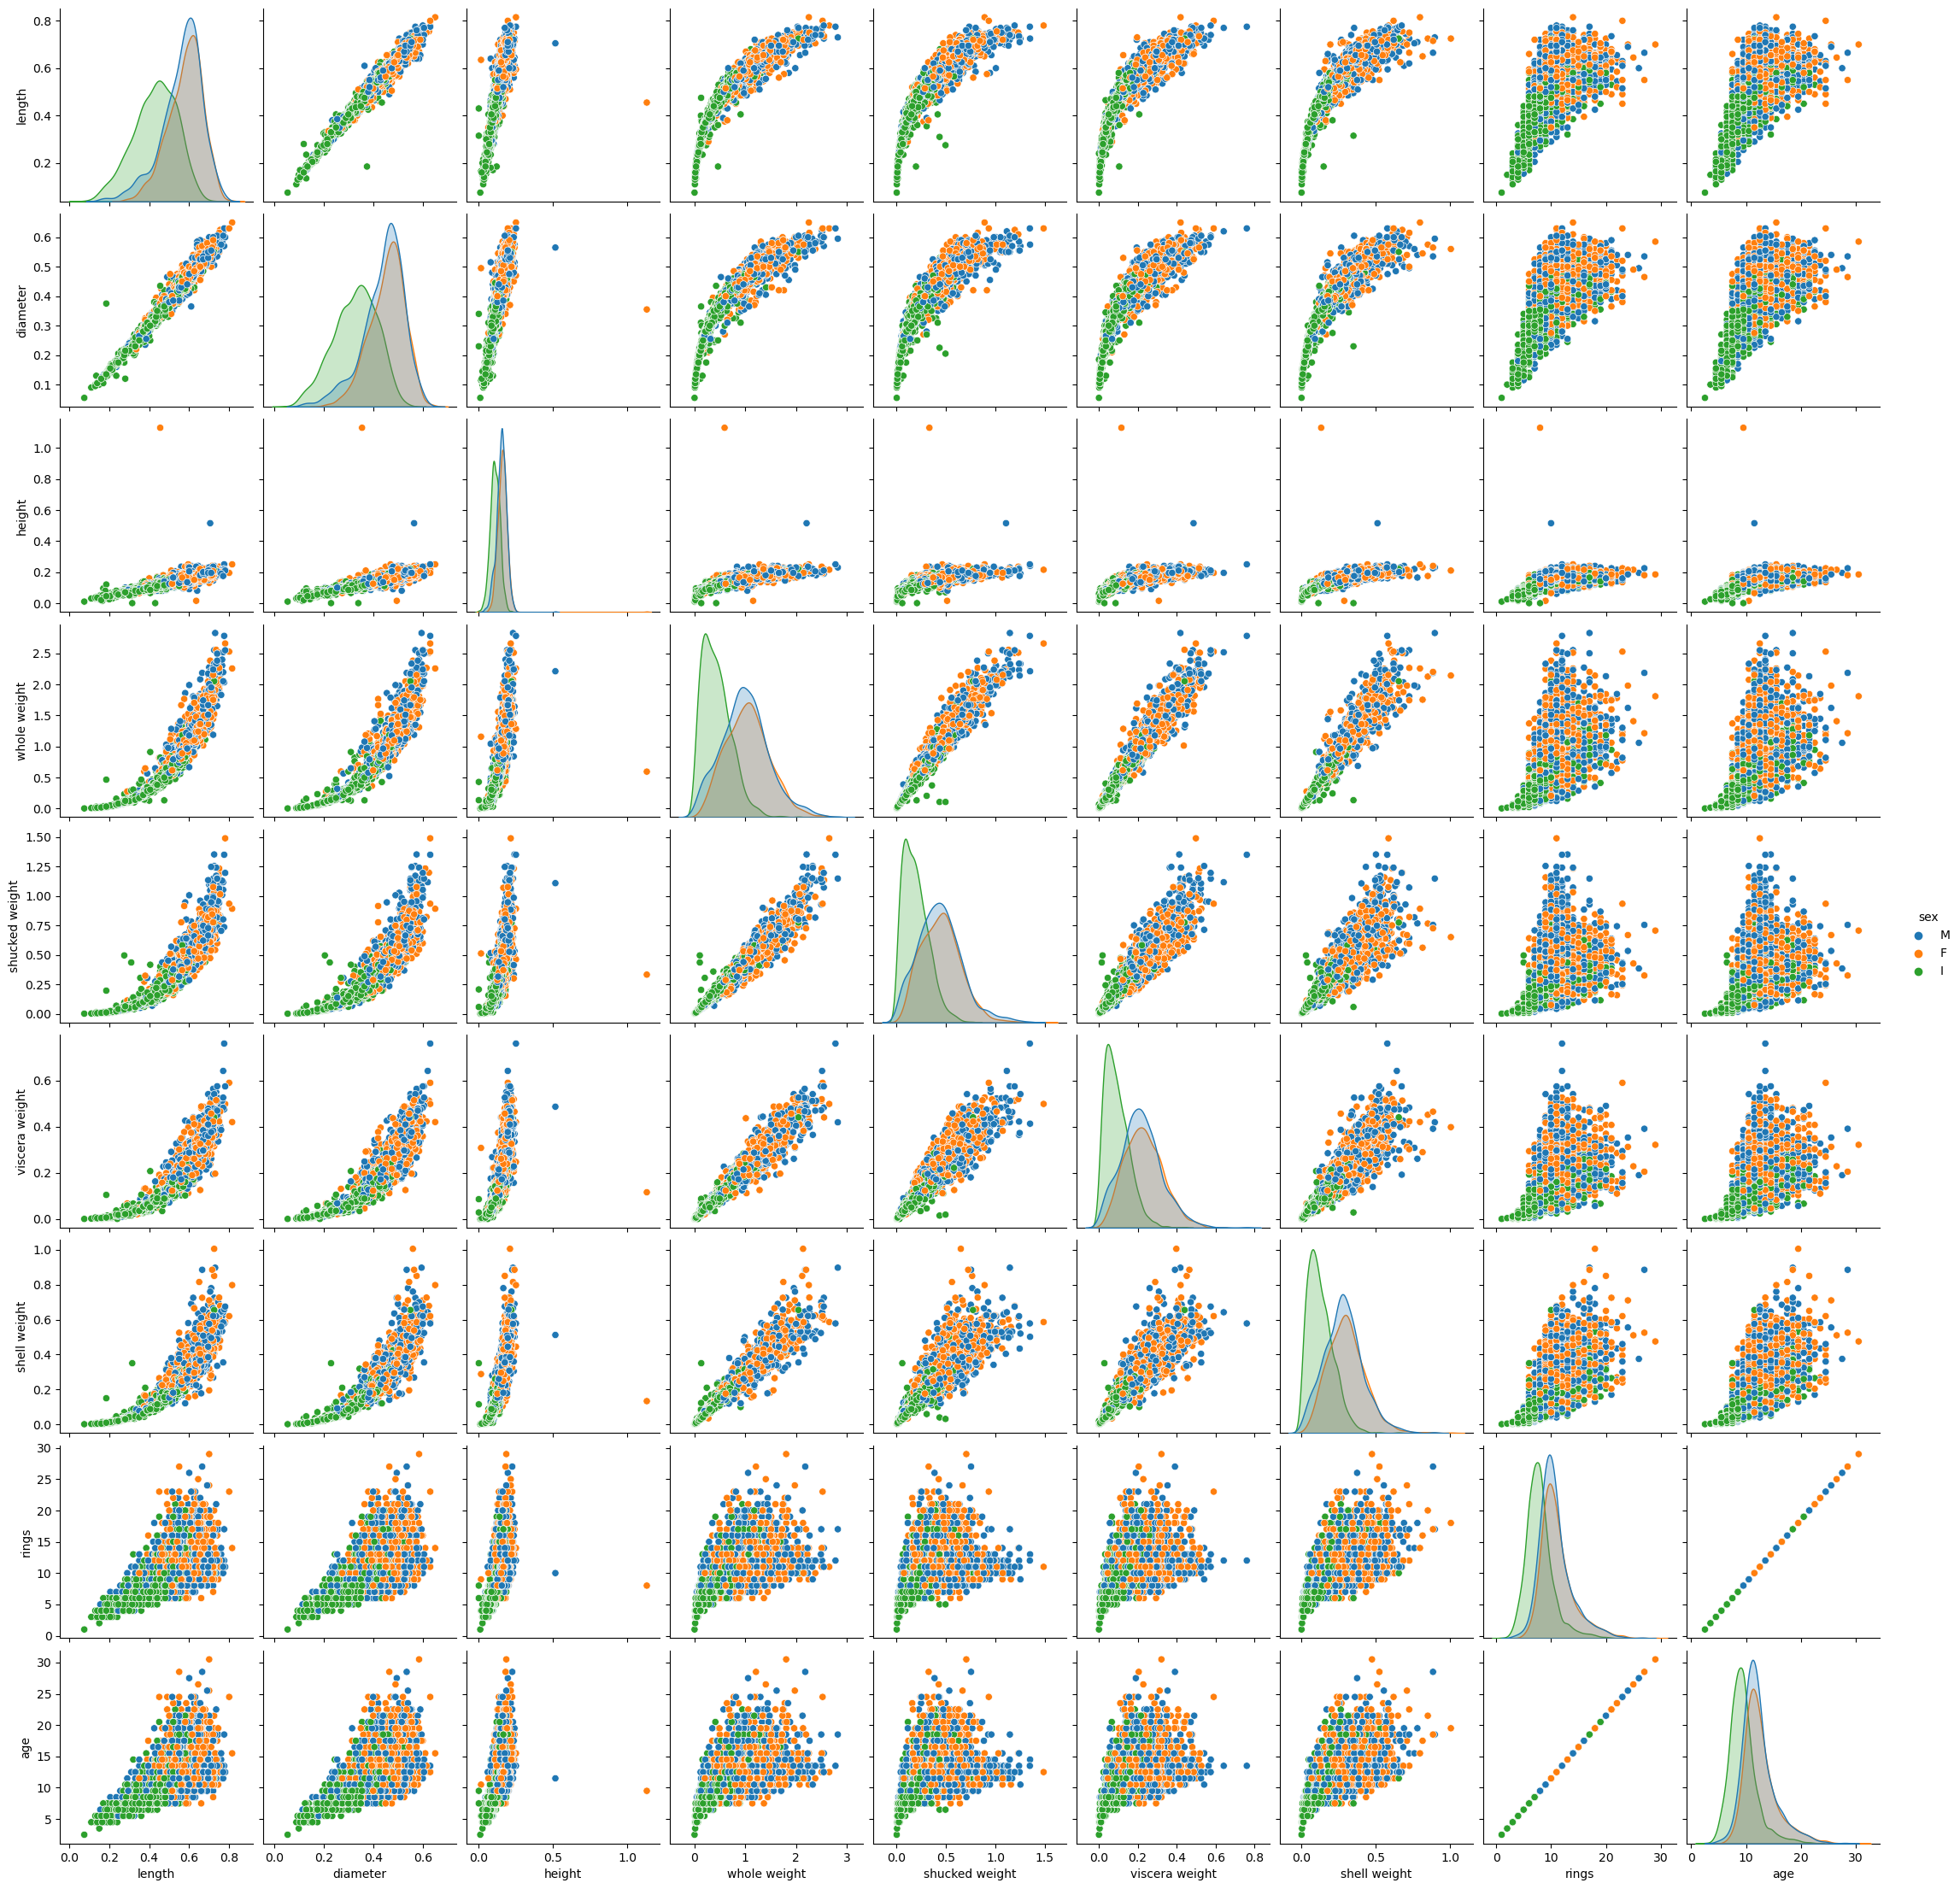

In [15]:
sns.pairplot(df, hue="sex")